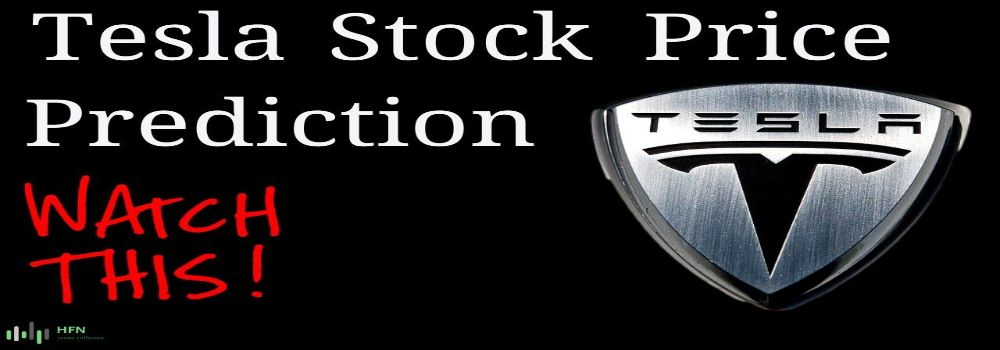

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('ggplot')

### Load & Read the Data

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\data-for-time-series\\TESLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [3]:
df.shape

(1258, 7)

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* No missing values.

##### CHange the data type of Date column to DateTIme

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### Time Series Forecasting

#### Duration of Data

In [9]:
print("Starting date: ",df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

Starting date:  2016-08-16 00:00:00
Ending date:  2021-08-13 00:00:00
Duration:  1823 days 00:00:00


#### Average Open & Closing price by Month

In [10]:
monthwise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,Close
Date,,
January,211.862118,212.589568
February,227.558569,227.040441
March,194.185782,193.161236
April,205.595030,205.671611
May,181.159451,180.826095
June,204.369197,204.726543
July,226.404302,226.023074
August,173.212144,174.174936
September,129.064456,128.870416


### Plot Open & Close price by Month

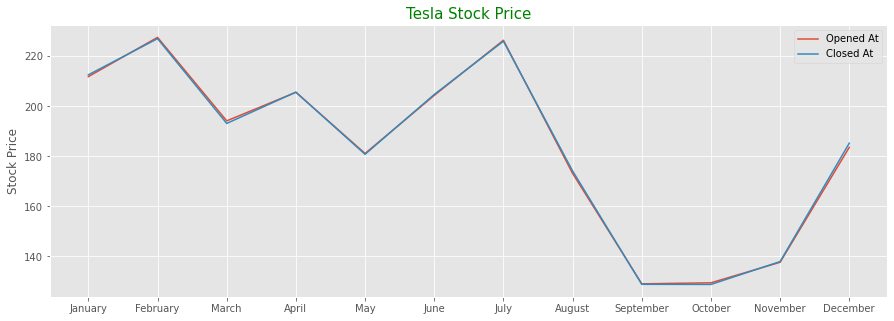

In [11]:
plt.figure(figsize=(15,5))
plt.plot(monthwise.Open, label='Opened At');
plt.plot(monthwise.Close, label='Closed At');
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.title('Tesla Stock Price', fontsize=15, color='green');

#### Set Date column as index of DataFram

In [12]:
data=df.set_index('Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


### Plot Open stock price

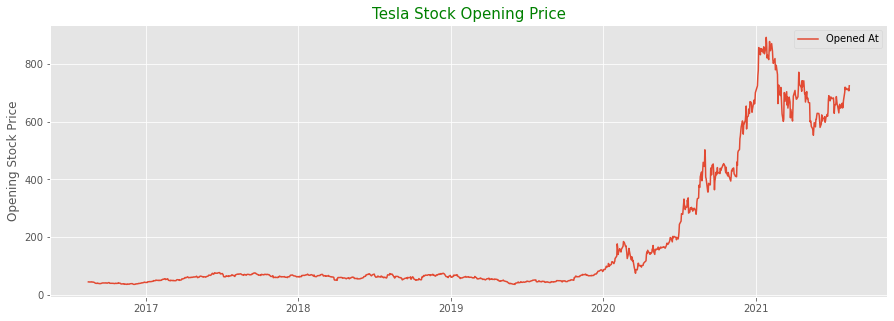

In [13]:
plt.figure(figsize=(15,5))
plt.plot(data.Open, label='Opened At');
plt.ylabel('Opening Stock Price', fontsize=12)
plt.legend()
plt.title('Tesla Stock Opening Price', fontsize=15, color='green');

### Plot Clossing stock price

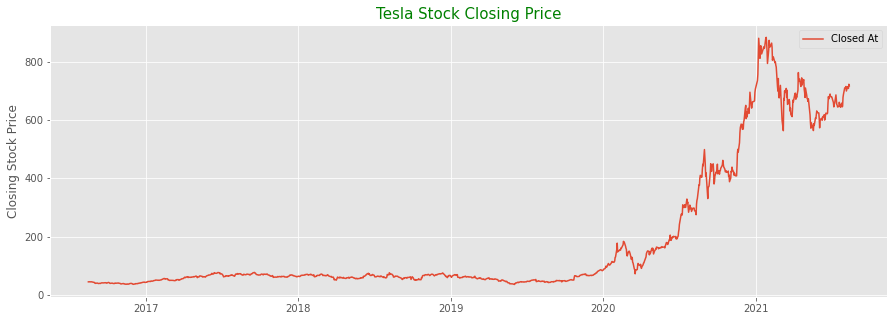

In [14]:
plt.figure(figsize=(15,5))
plt.plot(data.Close, label='Closed At');
plt.ylabel('Closing Stock Price', fontsize=12)
plt.legend()
plt.title('Tesla Stock Closing Price', fontsize=15, color='green');

### Plot High Stock price

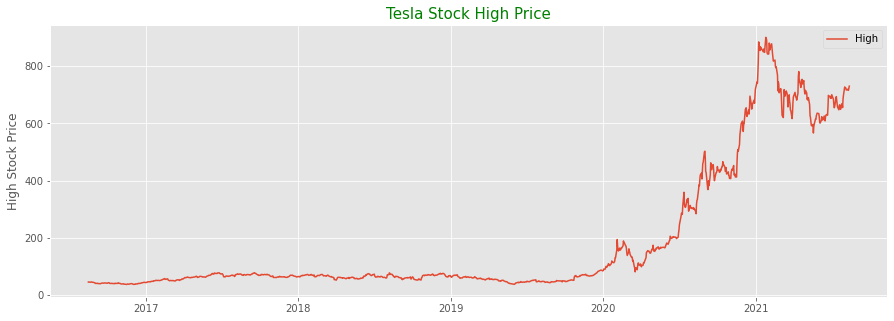

In [15]:
plt.figure(figsize=(15,5))
plt.plot(data.High, label='High');
plt.ylabel('High Stock Price', fontsize=12)
plt.legend()
plt.title('Tesla Stock High Price', fontsize=15, color='green');

### Plot Low stock price

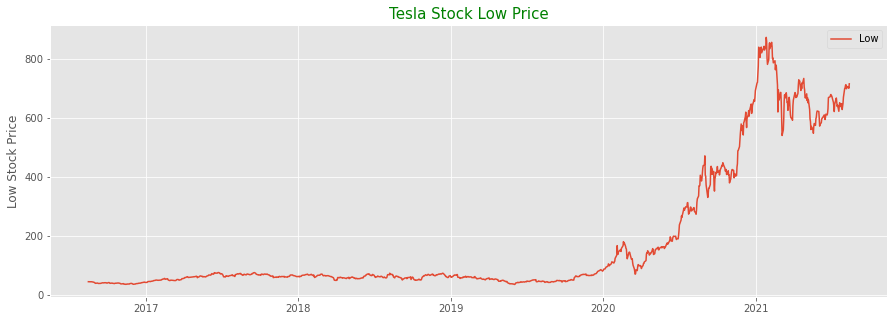

In [16]:
plt.figure(figsize=(15,5))
plt.plot(data.Low, label='Low');
plt.ylabel('Low Stock Price', fontsize=12)
plt.legend()
plt.title('Tesla Stock Low Price', fontsize=15, color='green');

### Plot Volume of stock

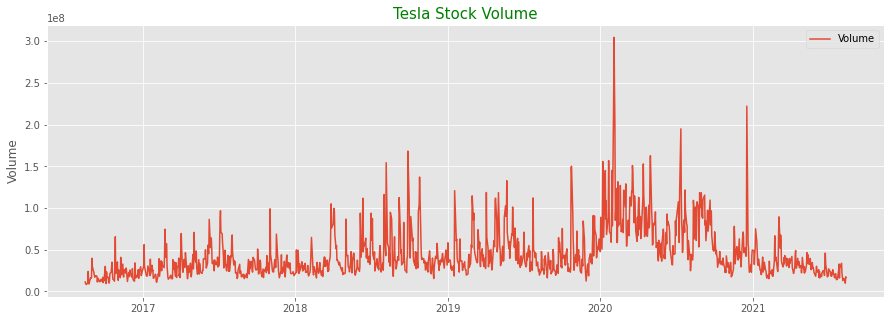

In [17]:
plt.figure(figsize=(15,5))
plt.plot(data.Volume, label='Volume');
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.title('Tesla Stock Volume', fontsize=15, color='green');

* Since 2017, Most stocks traded in year 2020 February.

#### Lets use last 1 years data for time series forecasting

In [18]:
df.Date.max()

Timestamp('2021-08-13 00:00:00')

Last day of data we have is 2021 Aug 13, so select data from 13 Aug 2020 to the last date.

In [19]:
selected_data=data[data.index>'2020-08-12']
selected_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-13,322.200012,330.235992,313.451996,324.200012,324.200012,102126500
2020-08-14,332.997986,333.760010,325.328003,330.141998,330.141998,62888000
2020-08-17,335.399994,369.171997,334.566010,367.127991,367.127991,101211500
2020-08-18,379.798004,384.779999,369.022003,377.417999,377.417999,82372500
2020-08-19,373.000000,382.200012,368.242004,375.705994,375.705994,61026500
...,...,...,...,...,...,...
2021-08-09,710.169983,719.030029,705.130005,713.760010,713.760010,14715300
2021-08-10,713.989990,716.590027,701.880005,709.989990,709.989990,13432300
2021-08-11,712.710022,715.179993,704.210022,707.820007,707.820007,9800600


In [20]:
ts=selected_data[['Close']]
ts

,Close
Date,
2020-08-13,324.200012
2020-08-14,330.141998
2020-08-17,367.127991
2020-08-18,377.417999
2020-08-19,375.705994
...,...
2021-08-09,713.760010
2021-08-10,709.989990
2021-08-11,707.820007


#### Train test split

In [21]:
train=ts[:230]
test=ts[230:]

## ETS Method

#### Build, train & Forecast

In [27]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train ,seasonal_periods=12 ,trend='add', seasonal=None)
model_fit = model.fit(optimized=True)
ets_forecast=model_fit.forecast(len(test))
ets_forecast.index=test.index
ets_forecast

Date
2021-07-14    671.650730
2021-07-15    673.401703
2021-07-16    675.152676
2021-07-19    676.903650
2021-07-20    678.654623
2021-07-21    680.405596
2021-07-22    682.156569
2021-07-23    683.907543
2021-07-26    685.658516
2021-07-27    687.409489
2021-07-28    689.160463
2021-07-29    690.911436
2021-07-30    692.662409
2021-08-02    694.413382
2021-08-03    696.164356
2021-08-04    697.915329
2021-08-05    699.666302
2021-08-06    701.417276
2021-08-09    703.168249
2021-08-10    704.919222
2021-08-11    706.670195
2021-08-12    708.421169
2021-08-13    710.172142
dtype: float64

#### Evaluate the model

In [28]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test, ets_forecast)).round(2)
mape = np.round(np.mean(np.abs(test.values-ets_forecast.values)/test.values)*100,2)

results = pd.DataFrame({'Method':['ETS with Trend'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,ETS with Trend,23.06,4.44


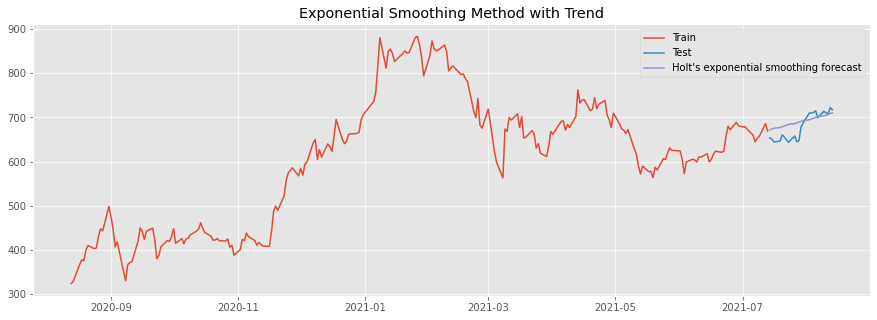

In [29]:
plt.figure(figsize=(15,5))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(ets_forecast, label='Holt\'s exponential smoothing forecast')
plt.legend()
plt.title('Exponential Smoothing Method with Trend');

### ARIMA Method

#### Build & train the model

In [32]:
import statsmodels.tsa.api as sm
model=sm.arima.ARIMA(train,order=(1, 1,1))
model_fit=model.fit()
arima_forecast=model_fit.predict(start=len(train), end=len(ts)-1)
arima_forecast.index=test.index
arima_forecast

Date
2021-07-14    669.694429
2021-07-15    669.739350
2021-07-16    669.741098
2021-07-19    669.741166
2021-07-20    669.741168
2021-07-21    669.741168
2021-07-22    669.741168
2021-07-23    669.741168
2021-07-26    669.741168
2021-07-27    669.741168
2021-07-28    669.741168
2021-07-29    669.741168
2021-07-30    669.741168
2021-08-02    669.741168
2021-08-03    669.741168
2021-08-04    669.741168
2021-08-05    669.741168
2021-08-06    669.741168
2021-08-09    669.741168
2021-08-10    669.741168
2021-08-11    669.741168
2021-08-12    669.741168
2021-08-13    669.741168
Name: predicted_mean, dtype: float64

#### Evaluate the model

In [33]:
print("RMSE:", np.sqrt(mean_squared_error(test, arima_forecast).round(2)))

RMSE: 31.400318469722563


##### Use itertools to iterate over different order & choose the order which gives lesser RMSE

In [34]:
warnings.filterwarnings('ignore')

import itertools
p=range(0,8)
q=range(0,8)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
len(pdq)

128

In [35]:
rmse=[]
order1=[]
for pdq in pdq:
    try:
        model=sm.arima.ARIMA(train, order=pdq).fit()
        pred=model.predict(start=len(train), end=len(ts)-1)
        error=np.sqrt(mean_squared_error(pred,test))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [36]:
order=pd.DataFrame(data=rmse, index=order1, columns=['RMSE'])
order.round()

,RMSE
"(0, 0, 0)",81.0
"(0, 0, 1)",81.0
"(0, 0, 2)",82.0
"(0, 0, 3)",80.0
"(0, 0, 4)",80.0
...,...
"(7, 1, 3)",34.0
"(7, 1, 4)",32.0
"(7, 1, 5)",29.0
"(7, 1, 6)",32.0


In [37]:
pd.pivot_table(order, values='RMSE', index=order.index, aggfunc=min).sort_values(by='RMSE', ascending=True)[:5].round()

,RMSE
"(7, 1, 5)",29.0
"(4, 1, 3)",31.0
"(4, 1, 4)",31.0
"(3, 1, 3)",31.0
"(1, 1, 4)",31.0


* When p=7, d=1, q=5 RMSE is very low, hence use these parameters to bulid the model.

In [38]:
model=sm.arima.ARIMA(train,order=(7,1,5))
model_fit = model.fit()
forecast_ARIMA=model_fit.predict(start=len(train), end=len(ts)-1)
forecast_ARIMA.index=test.index
forecast_ARIMA

Date
2021-07-14    665.771158
2021-07-15    669.208771
2021-07-16    668.566851
2021-07-19    667.050592
2021-07-20    671.030372
2021-07-21    668.637225
2021-07-22    671.728953
2021-07-23    670.294288
2021-07-26    669.827916
2021-07-27    671.089150
2021-07-28    669.285296
2021-07-29    672.271769
2021-07-30    671.307995
2021-08-02    672.542684
2021-08-03    672.698055
2021-08-04    671.393421
2021-08-05    672.797211
2021-08-06    671.566621
2021-08-09    673.326302
2021-08-10    673.492360
2021-08-11    673.650565
2021-08-12    674.406168
2021-08-13    673.147382
Name: predicted_mean, dtype: float64

In [39]:
rmse = np.sqrt(mean_squared_error(test,forecast_ARIMA)).round(2)
mape = np.round(np.mean(np.abs(test.values-forecast_ARIMA.values)/test.values)*100,2)

arima_results = pd.DataFrame({'Method':['ARIMA'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, arima_results])
results

,Method,RMSE,MAPE
0,ETS with Trend,23.06,4.44
0,ARIMA,29.37,4.15


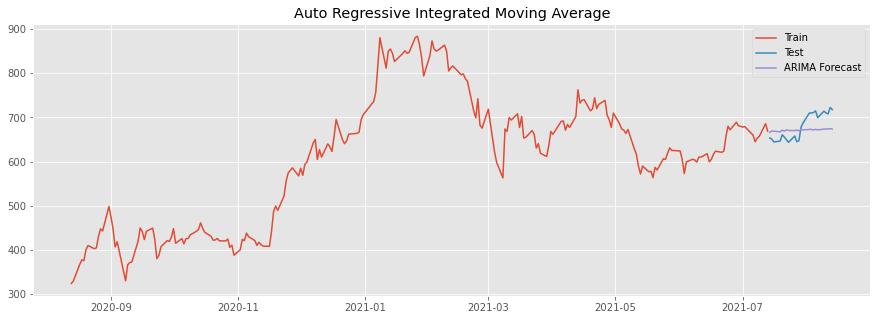

In [40]:
plt.figure(figsize=(15,5))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_ARIMA, label='ARIMA Forecast')
plt.legend()
plt.title('Auto Regressive Integrated Moving Average');

**Conclusion** : Our inference from the flow chart and the actual models built for forecasting the sales of the time series data, show that:

1. **Auto regressive integrated moving average (ARIMA) technique.**

2. **ETS with Trend**

are the best for forecasting the Stock price for the data.

Above two methods have lower RMSE and MAPE values and are able to capture the trend and seasonality components well in the data.